<a href="https://colab.research.google.com/github/Scsant/Inclui-placas/blob/main/fourthML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:


import sklearn
import pandas as pd
import matplotlib
import plotly
import numpy




In [74]:
dados = pd.read_csv('/content/dados_inadimplencia.csv')
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0,1
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0,0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0,0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0,0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14573,11250.000000,1893.150000,12.157324,1,2.0,0.501213,0.591424,0.513171,0.117428,545.0,0
14574,33750.000000,4900.050000,17.000000,0,3.0,0.501213,0.563311,0.513171,0.016500,502.0,1
14575,38070.000000,2878.650000,12.157324,0,3.0,0.501213,0.748159,0.513171,0.070100,699.0,0
14576,16855.246324,5154.300000,7.000000,0,2.0,0.501213,0.559936,0.513171,0.030600,1323.0,0


In [75]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0,1
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0,0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0,0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0,0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0,1


In [76]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [77]:
import plotly.express as px

In [78]:
px.histogram(dados, x = 'inadimplente', text_auto = True)

In [79]:
px.histogram(dados, x ='avaliacao_cidade', text_auto= True, color='inadimplente', barmode='group')

In [80]:
round(dados['inadimplente'].value_counts())



inadimplente
0    9862
1    4716
Name: count, dtype: int64

In [81]:
round(dados['inadimplente'].value_counts(normalize=True)*100, 2)


inadimplente
0    67.65
1    32.35
Name: proportion, dtype: float64

In [82]:
x = dados.drop('inadimplente', axis =1)
y = dados['inadimplente']


In [83]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=RANDOM_STATE, stratify=y)


In [84]:
from sklearn.tree import DecisionTreeClassifier


In [85]:
modelo_dt = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
modelo_dt.fit(x_treino, y_treino)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [86]:
from sklearn.metrics import recall_score

recall_dt = recall_score(y_teste, modelo_dt.predict(x_teste))
print(f"Recall do DT = {recall_dt:.3f}")


Recall do DT = 0.143


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [88]:
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())


In [89]:
logistic_pipeline.fit(x_treino, y_treino)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [90]:
recall_lr = recall_score(y_teste, logistic_pipeline.predict(x_teste))
print(f"Recall do logistic regression = {recall_lr:.3f}")


Recall do logistic regression = 0.253


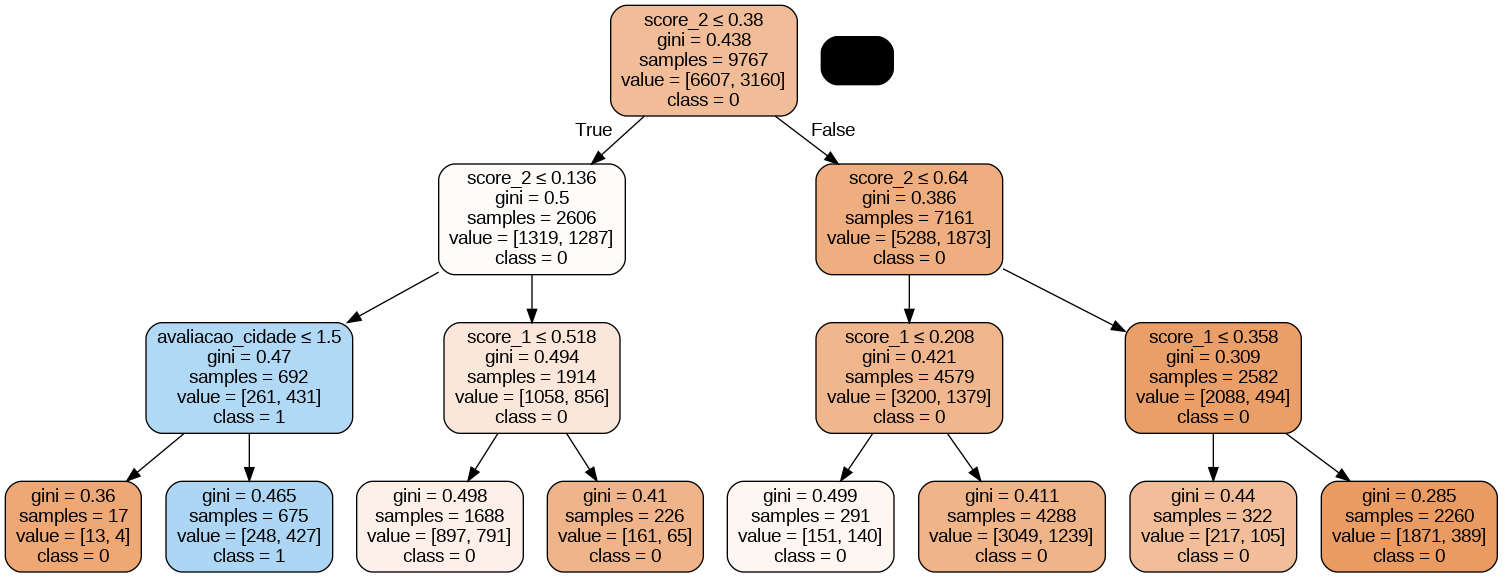

In [91]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth =3, random_state=42)
modelo.fit(x_treino, y_treino)

feature_cols = x_treino.columns
dot_data = StringIO()

export_graphviz(modelo, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logistic_pipeline.fit(x_treino, y_treino)

nome_colunas = list(x_treino.columns)
coef_model = logistic_pipeline.named_steps['logisticregression'].coef_[0]
coef_df = pd.DataFrame({"Coluna": nome_colunas, "coeficientes": coef_model})
coef_df.sort_values(by="coeficientes", ascending=False)


,Coluna,coeficientes
4,avaliacao_cidade,0.093452
2,anos_casa_propria,0.078377
1,anuidade_emprestimo,0.036435
0,receita_cliente,-0.012698
3,telefone_trab,-0.031357
8,score_social,-0.075063
9,troca_telefone,-0.096932
7,score_3,-0.149141
5,score_1,-0.250036
6,score_2,-0.465081


In [93]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [94]:
import numpy as np

param_grid_dt = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int),
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}


In [95]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [96]:
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring="recall",
    n_jobs=-1,
    cv=cv
)


In [97]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                              param_grid = param_grid_dt,
                              scoring = "recall",
                              n_jobs = -1,
                              cv = cv)

dt_grid_search.fit(x_treino, y_treino)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [98]:
# Inicio do código

import pandas as pd
import numpy as np

target = np.ones(16)
target[-4:] = 0

df = pd.DataFrame({'feature':np.random.random(16), 'rotulo':target})
df

,feature,rotulo
0,0.889502,1.0
1,0.785555,1.0
2,0.850881,1.0
3,0.468238,1.0
4,0.083322,1.0
5,0.238031,1.0
6,0.948076,1.0
7,0.670791,1.0
8,0.879088,1.0
9,0.856520,1.0


In [99]:
from sklearn.model_selection import StratifiedKFold

X = df.feature
y = df.rotulo

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for treino_index, teste_index in skf.split(X, y):
    print("Treino:", treino_index, "Teste:", teste_index)

Treino: [ 0  1  3  4  7  8  9 10 11 13 14 15] Teste: [ 2  5  6 12]
Treino: [ 0  1  2  3  5  6  7  9 11 12 14 15] Teste: [ 4  8 10 13]
Treino: [ 0  1  2  4  5  6  7  8 10 12 13 15] Teste: [ 3  9 11 14]
Treino: [ 2  3  4  5  6  8  9 10 11 12 13 14] Teste: [ 0  1  7 15]


In [100]:
dt_grid_search.best_params_


{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'splitter': 'best'}

In [101]:
dt_grid_search.cv_results_


{'mean_fit_time': array([0.02735882, 0.01324987, 0.03986869, 0.01750512, 0.02108974,
        0.01012506, 0.02059426, 0.00888901, 0.01624818, 0.00924635,
        0.01755571, 0.00876899, 0.01600075, 0.00806451, 0.01917677,
        0.00952272, 0.01689448, 0.00841212, 0.01650362, 0.01036377,
        0.02287502, 0.01108494, 0.0288486 , 0.01321659, 0.03495474,
        0.00780153, 0.0483706 , 0.02306409, 0.04570651, 0.03138008,
        0.04857602, 0.02411046, 0.0402719 , 0.01661   , 0.03419032,
        0.01542716, 0.03063622, 0.01409535, 0.02908392, 0.01074467,
        0.03080645, 0.01399865, 0.02648153, 0.0133038 , 0.02981195,
        0.01582255, 0.01755452, 0.01474571, 0.0331666 , 0.01220765,
        0.03766241, 0.03578238, 0.05166435, 0.03143053, 0.0631568 ,
        0.03352137, 0.06411481, 0.03718419, 0.05790501, 0.03346553,
        0.05158978, 0.0291472 , 0.05167341, 0.01878386, 0.03237972,
        0.01751771, 0.02434783, 0.01486244, 0.03801155, 0.01206546,
        0.02454052, 0.01858525,

In [102]:
pd.DataFrame(dt_grid_search.cv_results_).head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027359,0.005787,0.009324,0.002879,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.013250,0.004831,0.009704,0.004725,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.039869,0.007386,0.011852,0.005561,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251


In [103]:
df_cv_results_dt = pd.DataFrame(dt_grid_search.cv_results_)
df_cv_results_dt.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027359,0.005787,0.009324,0.002879,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.013250,0.004831,0.009704,0.004725,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.039869,0.007386,0.011852,0.005561,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
3,0.017505,0.007431,0.015611,0.005221,gini,6,sqrt,5,10,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
4,0.021090,0.004176,0.008995,0.003323,gini,6,sqrt,5,15,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.200949,0.145570,0.180380,0.164557,0.204114,0.179114,0.022093,277


In [104]:
df_cv_results_dt.loc[[dt_grid_search.best_index_]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.030099,0.009687,0.012761,0.004831,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


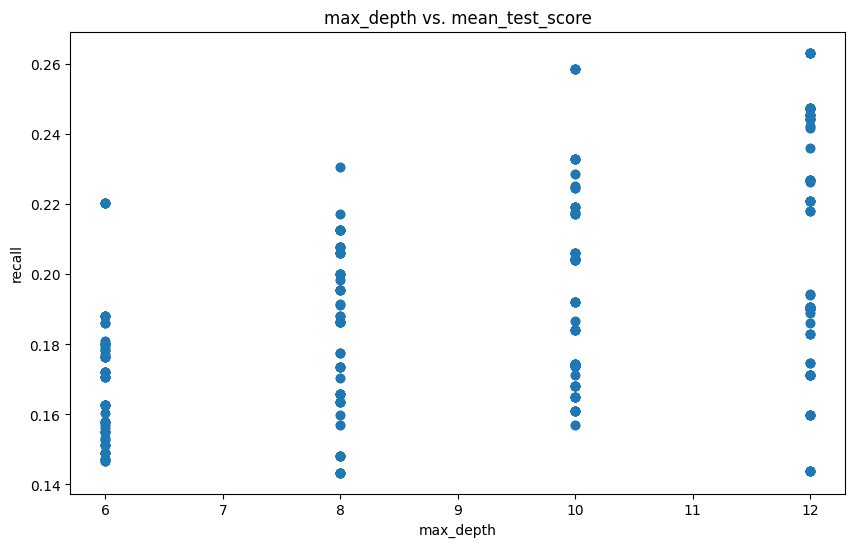

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_max_depth'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('max_depth vs. mean_test_score')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.show()


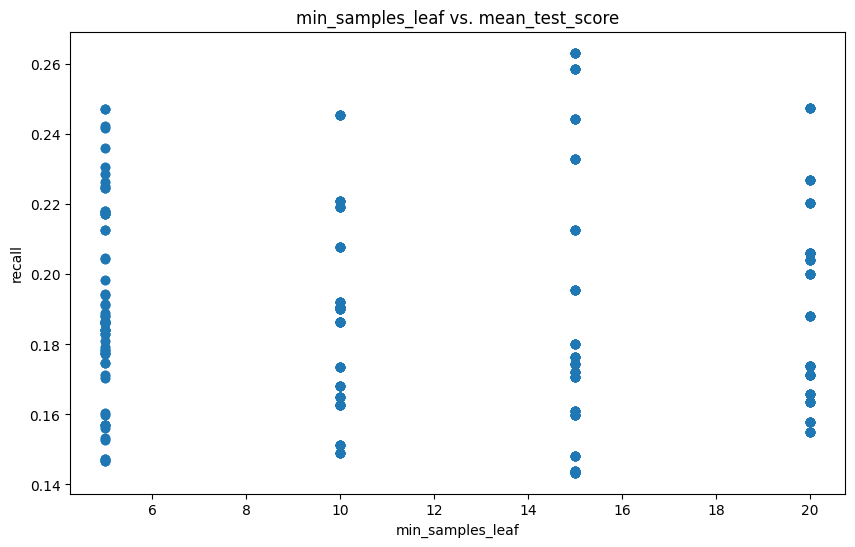

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_min_samples_leaf'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('min_samples_leaf vs. mean_test_score')
plt.xlabel('min_samples_leaf')
plt.ylabel('recall')
plt.show()


In [107]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                              param_grid = param_grid_dt,
                              scoring = "recall",
                              n_jobs = -1,
                              cv = cv)

dt_grid_search.fit(x_treino, y_treino)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [108]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]


In [109]:
lr_grid_search = GridSearchCV(estimator = make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
                               param_grid = param_grid_lr,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = cv)

lr_grid_search.fit(x_treino, y_treino)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [110]:
lr_grid_search.best_params_


{'logisticregression__C': 0.001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [111]:
df_cv_results_lr = pd.DataFrame(lr_grid_search.cv_results_)
df_cv_results_lr.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040696,0.005566,0.008102,0.001840,0.001,100,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
1,0.019210,0.001568,0.006909,0.000158,0.001,100,l2,lbfgs,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
2,0.041511,0.009044,0.008737,0.002890,0.001,150,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
3,0.020420,0.002795,0.007231,0.000287,0.001,150,l2,lbfgs,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
4,0.039157,0.004661,0.007296,0.000342,0.001,200,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86


In [112]:
df_cv_results_lr.loc[[lr_grid_search.best_index_]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,0.023364,0.002511,0.007762,0.0006,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1


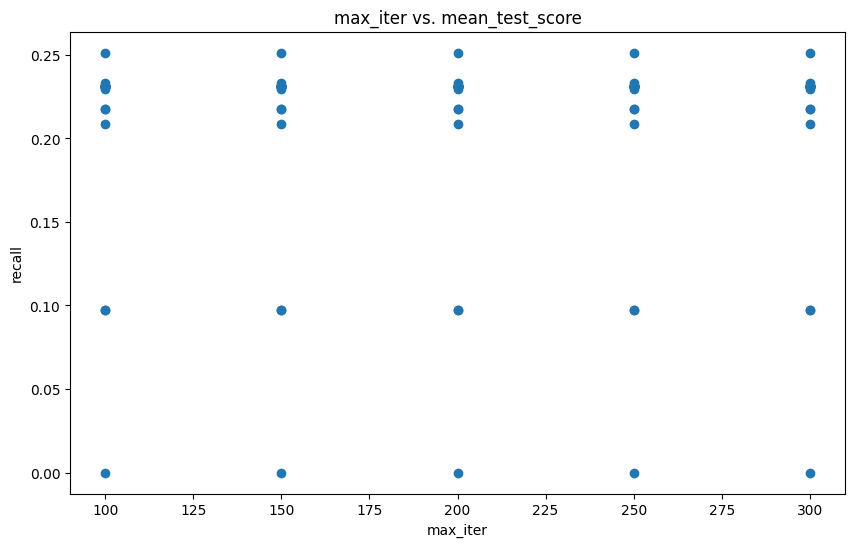

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_lr['param_logisticregression__max_iter'],
    df_cv_results_lr['mean_test_score'],
    )

plt.title('max_iter vs. mean_test_score')
plt.xlabel('max_iter')
plt.ylabel('recall')
plt.show()


In [114]:
inner_cv = StratifiedKFold(shuffle=True, random_state=RANDOM_STATE)

outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)



In [115]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                                         param_grid = param_grid_dt,
                                         scoring = "recall",
                                         n_jobs = -1,
                                         cv = cv,
                                         verbose = 2,
                                         )

dt_grid_search.fit(x_treino, y_treino)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=2)

In [116]:
dt_nested_gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                                         param_grid = param_grid_dt,
                                         scoring = "recall",
                                         n_jobs = -1,
                                         cv = inner_cv
                                         )

dt_grid_search.fit(x_treino, y_treino)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=2)

In [117]:
from sklearn.model_selection import cross_val_score

dt_nested_gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                                         param_grid = param_grid_dt,
                                         scoring = "recall",
                                         n_jobs = -1,
                                         cv = inner_cv
                                         )

dt_nested_scores = cross_val_score(dt_nested_gs, x_treino, y_treino, cv=outer_cv)


In [118]:
print(f'resultado de cada iteração do cv externo: {dt_nested_scores}')
print(f'média: {dt_nested_scores.mean()}')


resultado de cada iteração do cv externo: [0.23646724 0.24762808 0.20512821]
média: 0.2297411750289676


In [119]:
from numpy import linspace
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

lr_nested_gs = GridSearchCV(estimator = make_pipeline(StandardScaler(), LogisticRegression()),
                               param_grid = param_grid_lr,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = inner_cv)

lr_nested_scores = cross_val_score(lr_nested_gs, x_treino, y_treino, cv=outer_cv)


In [71]:
print("Métricas de desempenho para cada iteração do CV externo:", lr_nested_scores)
print(f"Média das métricas de desempenho do CV externo: {lr_nested_scores.mean():.4f}") # melhorar esse texto para se referenciar somente a métrica recall

lr_nested_gs.fit(x_treino, y_treino)
best_params = lr_nested_gs.best_params_
print("Melhores hiperparâmetros:", best_params)


Métricas de desempenho para cada iteração do CV externo: [0.24691358 0.27703985 0.2374169 ]
Média das métricas de desempenho do CV externo: 0.2538
Melhores hiperparâmetros: {'logisticregression__C': 0.001, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
rs_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
            param_distributions=param_grid_dt,
            n_iter=100,
            scoring='recall',
            n_jobs=-1,
            cv=inner_cv,
            random_state=RANDOM_STATE)

rs_dt_nested_score = cross_val_score(rs_dt, x_treino, y_treino, cv=outer_cv)



In [125]:
print(f'resultado de cada iteração do cv externo: {rs_dt_nested_score}')
print(f'média: {rs_dt_nested_score.mean()}')

resultado de cada iteração do cv externo: [0.23646724 0.18975332 0.21272555]
média: 0.21298203440307595


In [126]:
rs_dt.fit(x_treino, y_treino)
rs_dt.best_params_


{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}

In [127]:
rs_lr = RandomizedSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
        param_distributions=param_grid_lr,
        n_iter=50,
        scoring='recall',
        n_jobs=-1,
        cv=inner_cv,
        random_state=RANDOM_STATE)

rs_lr_nested_scores = cross_val_score(rs_lr, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {rs_lr_nested_scores}')
print(f'média: {rs_lr_nested_scores.mean()}')


resultado de cada iteração do cv externo: [0.24691358 0.27703985 0.2374169 ]
média: 0.2537901108426093


In [128]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Número de tentativas aleatórias
NUM_TRIALS = 30

# Definindo a grade de hiperparâmetros
p_grid = {"max_depth": [10, 20, 30, 40],
          "min_samples_split": [2, 5, 10],
          "min_samples_leaf": [1, 2, 4]}

dt_classifier = DecisionTreeClassifier(random_state=42)

# Arrays para armazenar as pontuações.
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop para cada tentativa
for i in range(NUM_TRIALS):
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)

    # Pesquisa e pontuação de parâmetros não aninhados
    clf = RandomizedSearchCV(estimator=dt_classifier,
                             param_distributions=p_grid,
                             cv=outer_cv,
                             n_iter=18,
                             random_state=i)
    clf.fit(x_treino, y_treino)
    non_nested_scores[i] = clf.best_score_

    # CV aninhado com otimização de parâmetros
    clf = RandomizedSearchCV(estimator=dt_classifier,
                             param_distributions=p_grid,
                             cv=inner_cv,
                             n_iter=18,
                             random_state=i)
    nested_score = cross_val_score(clf, X=x_treino, y=y_treino, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


In [129]:
import plotly.express as px
import pandas as pd

score_difference = non_nested_scores - nested_scores

# Cria um DataFrame para armazenar os escores
df = pd.DataFrame({
    'Trial': range(NUM_TRIALS),
    'Non-Nested CV Score': non_nested_scores,
    'Nested CV Score': nested_scores,
    'Score Difference': score_difference
})

# Cria um gráfico de linha para os escores de CV aninhados e não aninhados
fig = px.line(df, x='Trial', y=['Non-Nested CV Score', 'Nested CV Score'],
                 labels={'value': 'Escore', 'variable': 'Tipo de CV', 'Trial': 'Tentativa Individual #'},
               title='Validação Cruzada Não Aninhada e Aninhada')
fig.show()

# Cria um gráfico de barras para a diferença de scores
fig = px.bar(df, x='Trial', y='Score Difference',
             labels={'Score Difference': 'diferença de escores', 'Trial': 'Tentativa Individual #'},
             title='Diferença de Escores entre CV Não Aninhado e Aninhado')
fig.show()


In [130]:
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.4 MB/s eta 0:00:00


In [131]:
from skopt.space import Real, Integer, Categorical

space_dt = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(6, 12),
    'min_samples_split': Integer(5, 20),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'splitter': Categorical(['best', 'random'])
}


In [132]:


# Step 2: Define the hyperparameter space
from skopt.space import Real, Integer, Categorical
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the search space for DecisionTreeClassifier
space_dt = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(6, 12),
    'min_samples_split': Integer(5, 20),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'splitter': Categorical(['best', 'random'])
}

# Step 3: Implement Bayesian Optimization with nested cross-validation
RANDOM_STATE = 42
inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

opt_dt = BayesSearchCV(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                       search_spaces=space_dt,
                       n_iter=50,
                       scoring='recall',
                       n_jobs=-1,
                       cv=inner_cv,
                       random_state=RANDOM_STATE)

# Perform nested cross-validation
bs_dt_nested_scores = cross_val_score(opt_dt, x_treino, y_treino, cv=outer_cv)

# Step 4: Print the results
print(f'Resultado de cada iteração do cv externo: {bs_dt_nested_scores}')
print(f'Média: {bs_dt_nested_scores.mean()}')

# Fit the model to find the best hyperparameters
opt_dt.fit(x_treino, y_treino)
print(f'Melhores hiperparâmetros: {opt_dt.best_params_}')


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 12, 'sqrt', 5, 5, 'best'] before, using random point ['gini', 9, 'log2', 9, 20, 'best']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 12, 'sqrt', 5, 5, 'best'] before, using random point ['gini', 8, 'log2', 10, 11, 'random']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 12, 'sqrt', 5, 5, 'best'] before, using random point ['entropy', 9, 'sqrt', 15, 14, 'random']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['gini', 12, 'sqrt', 5, 5, 'best'] before, using random point ['gini', 7, 'sqrt', 14, 13, 'random']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: Us

Resultado de cada iteração do cv externo: [0.26495726 0.18311195 0.29344729]
Média: 0.24717217095458713
Melhores hiperparâmetros: OrderedDict([('criterion', 'gini'), ('max_depth', 11), ('max_features', 'sqrt'), ('min_samples_leaf', 19), ('min_samples_split', 5), ('splitter', 'best')])


In [133]:


# Step 2: Define the hyperparameter space
from skopt.space import Real, Integer, Categorical
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the search space for LogisticRegression
space_lr = [
    {
        'logisticregression__solver': Categorical(['newton-cg', 'lbfgs']),
        'logisticregression__penalty': Categorical(['l2']),
        'logisticregression__max_iter': Integer(100, 300),
        'logisticregression__C': Real(0.001, 10, prior='log-uniform')
    },
    {
        'logisticregression__solver': Categorical(['liblinear']),
        'logisticregression__penalty': Categorical(['l1', 'l2']),
        'logisticregression__max_iter': Integer(100, 300),
        'logisticregression__C': Real(0.001, 10, prior='log-uniform')
    }
]

# Step 3: Implement Bayesian Optimization with nested cross-validation
RANDOM_STATE = 42
inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

opt_lr = BayesSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression(random_state=RANDOM_STATE)),
                       search_spaces=space_lr,
                       n_iter=50,
                       scoring='recall',
                       n_jobs=-1,
                       cv=inner_cv,
                       random_state=RANDOM_STATE)

# Perform nested cross-validation
bs_lr_nested_scores = cross_val_score(opt_lr, x_treino, y_treino, cv=outer_cv)

# Step 4: Print the results
print(f'Resultado de cada iteração do cv externo: {bs_lr_nested_scores}')
print(f'Média: {bs_lr_nested_scores.mean()}')

# Fit the model to find the best hyperparameters
opt_lr.fit(x_treino, y_treino)
print(f'Melhores hiperparâmetros: {opt_lr.best_params_}')

# Predict on the test set (assuming x_teste is defined)
y_pred = opt_lr.predict(x_teste)
print(y_pred)


Resultado de cada iteração do cv externo: [0.24691358 0.27703985 0.2374169 ]
Média: 0.2537901108426093
Melhores hiperparâmetros: OrderedDict([('logisticregression__C', 0.001), ('logisticregression__max_iter', 300), ('logisticregression__penalty', 'l2'), ('logisticregression__solver', 'liblinear')])
[0 1 0 ... 0 0 0]


In [134]:



# Step 2: Define the hyperparameter space
from skopt.space import Real, Integer, Categorical
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the search space for KNeighborsClassifier
space_knn = {
    'n_neighbors': Integer(1, 30),
    'weights': Categorical(['uniform', 'distance']),
    'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])
}

# Step 3: Implement Bayesian Optimization with nested cross-validation
RANDOM_STATE = 42
inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

opt_knn = BayesSearchCV(estimator=KNeighborsClassifier(),
                        search_spaces=space_knn,
                        n_iter=50,
                        scoring='recall',
                        n_jobs=-1,
                        cv=inner_cv,
                        random_state=RANDOM_STATE)

# Perform nested cross-validation
bs_knn_nested_scores = cross_val_score(opt_knn, x_treino, y_treino, cv=outer_cv)

# Step 4: Print the results
print(f'Resultado de cada iteração do cv externo: {bs_knn_nested_scores}')
print(f'Média: {bs_knn_nested_scores.mean()}')

# Fit the model to find the best hyperparameters
opt_knn.fit(x_treino, y_treino)
print(f'Melhores hiperparâmetros: {opt_knn.best_params_}')


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['manhattan', 1, 'distance'] before, using random point ['minkowski', 7, 'uniform']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['manhattan', 1, 'distance'] before, using random point ['minkowski', 23, 'uniform']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['euclidean', 1, 'distance'] before, using random point ['minkowski', 20, 'distance']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['euclidean', 1, 'distance'] before, using random point ['manhattan', 6, 'distance']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['eucl

Resultado de cada iteração do cv externo: [0.35042735 0.36148008 0.35517569]
Média: 0.35569437161256684


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['manhattan', 1, 'uniform'] before, using random point ['manhattan', 23, 'uniform']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['manhattan', 1, 'uniform'] before, using random point ['minkowski', 7, 'uniform']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['euclidean', 1, 'distance'] before, using random point ['manhattan', 17, 'uniform']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['euclidean', 1, 'distance'] before, using random point ['manhattan', 18, 'distance']

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

The objective has been evaluated at point ['euclid

Melhores hiperparâmetros: OrderedDict([('metric', 'manhattan'), ('n_neighbors', 1), ('weights', 'distance')])
